In [5]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [6]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
# maze = gym.make('corridor-40-v0')
maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()

[..........X........$]


In [9]:
from lcs.agents.xcs import XCS, Configuration

# TODO: Move to utils
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and
                                                 cl.wildcard_number == 0]):
            nr_correct += 1
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }


cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=1,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 500, False)

for cl in explore_population:
    print(str(cl))
print(explore_population.prediction_array)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 200, 'reward': 9.900947691176333e-39, 'population': 28, 'knowledge': 0.7, 'numerosity': 92}


INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 9, 'reward': 183.87686566743093, 'population': 38, 'knowledge': 0.95, 'numerosity': 176}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 11, 'reward': 187.15347496865974, 'population': 38, 'knowledge': 0.95, 'numerosity': 180}


INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 26, 'reward': 185.63509742568007, 'population': 38, 'knowledge': 0.95, 'numerosity': 182}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 12, 'reward': 207.2434554850408, 'population': 38, 'knowledge': 0.95, 'numerosity': 182}


INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 39, 'reward': 173.6313199046093, 'population': 38, 'knowledge': 0.95, 'numerosity': 182}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 15, 'reward': 151.8576765704477, 'population': 38, 'knowledge': 0.85, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 20, 'reward': 145.44320775893124, 'population': 38, 'knowledge': 0.85, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 21, 'reward': 169.9271720767655, 'population': 38, 'knowledge': 0.85, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 42, 'reward': 133.68769916487705, 'population': 38, 'knowledge': 0.85, 'numerosity': 200}


Cond:11 - Act:0 - Num:9 [fit: 0.004, exp: 245.00, pred: 171.846]
Cond:11 - Act:1 - Num:6 [fit: 0.000, exp: 564.00, pred: 206.975]
Cond:12 - Act:0 - Num:7 [fit: 0.011, exp: 250.00, pred: 167.618]
Cond:12 - Act:1 - Num:5 [fit: 0.000, exp: 596.00, pred: 196.972]
Cond:13 - Act:0 - Num:8 [fit: 0.006, exp: 252.00, pred: 151.764]
Cond:13 - Act:1 - Num:5 [fit: 0.000, exp: 615.00, pred: 179.142]
Cond:#0 - Act:0 - Num:7 [fit: 0.536, exp: 214.00, pred: 187.891]
Cond:10 - Act:1 - Num:5 [fit: 0.000, exp: 533.00, pred: 215.463]
Cond:9 - Act:0 - Num:4 [fit: 0.000, exp: 163.00, pred: 201.656]
Cond:9 - Act:1 - Num:7 [fit: 0.000, exp: 477.00, pred: 236.483]
Cond:8 - Act:0 - Num:4 [fit: 0.000, exp: 124.00, pred: 200.185]
Cond:8 - Act:1 - Num:4 [fit: 0.000, exp: 402.00, pred: 266.716]
Cond:7 - Act:0 - Num:3 [fit: 0.000, exp: 120.00, pred: 193.588]
Cond:7 - Act:1 - Num:6 [fit: 0.000, exp: 342.00, pred: 292.948]
Cond:6 - Act:0 - Num:7 [fit: 0.000, exp: 116.00, pred: 200.577]
Cond:6 - Act:1 - Num:5 [fit: 0.0

(0.0, 250.0)

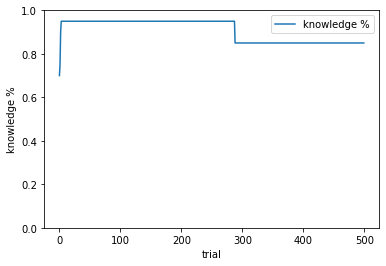

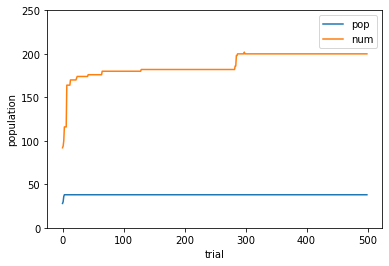

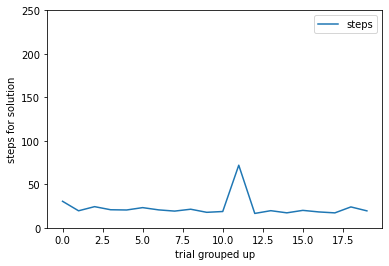

In [10]:
import pandas as pd
import numpy as np

# TODO Merge explore and exploit

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])
ax.set_ylim(ymin=0, ymax=1)


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])
ax.set_ylim(ymin=0, ymax=250)


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
ax = df.plot()
ax.set_xlabel("trial grouped up")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
ax.set_ylim(ymin=0, ymax=250)